<a href="https://colab.research.google.com/github/CormacKrum/Deep-Learning/blob/master/CNN_Cats_Dogs_Humans_Horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-06-19 22:34:25--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-06-19 22:34:25--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0789a8ba5dd4f6e08c055b97d.dl.dropboxusercontent.com/zip_download_get/AdUjoVE44-pULUkzR8Si1-Df0qwmHjo-nZNRlfejxnQ0jJDb8P-gkU6-cG_DlrzMespBvKJsyUXaMa5nFGpdukbAW98zWnOe1reS7MD9Ptz5vw [following]
--2020-06-19 22:34:27--  https://ucc0789a8ba5dd4f6e08c055b97d.dl.dropboxusercontent.com/zip_download_get/AdUjoVE44-pULUkzR8Si1-Df0qwmHjo-nZNRlfejxnQ0jJDb8P-gkU6-cG_DlrzMespBvKJsyUXaMa5nFGpd

In [2]:
! unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [3]:
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [4]:
import os,shutil
folders = os.listdir("Images")

In [5]:
if not os.path.isdir("val_images"):
  os.mkdir("val_images")
classes = ["dogs","cats","horses","humans"]

In [6]:
for f in folders:
  path = "Images/"+f
  print(f+" "+str(len(os.listdir(path))))

dogs 202
cats 202
humans 202
horses 202


In [7]:
for c in classes:
  p = os.path.join("val_images",c)
  os.mkdir(p)

split = 0.9
for f in os.listdir("Images"):
  path = "Images/"+f
  imgs = os.listdir(path)

  split_size = int(split*len(imgs))
  files_to_move = imgs[split_size:]
  #print(files_to_move)
  for img_f in files_to_move:
    src = os.path.join(path,img_f)
    dest = os.path.join("val_images",f,img_f)
    shutil.move(src,dest)
    #print(src)
    #print(dest)

In [8]:
for f in folders:
  path = "Images/"+f
  print(f+" "+str(len(os.listdir(path))))

dogs 181
cats 181
humans 181
horses 181


In [9]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [10]:
sample_path = "Images/cats/cat.1.jpg"
img = image.load_img(sample_path)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


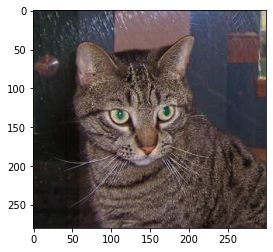

In [11]:
x= image.img_to_array(img)/255.0
plt.imshow(x)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from keras import optimizers
adam = optimizers.adam(lr=1e-4)
model.compile(optimizer =adam ,metrics=["accuracy"],loss='categorical_crossentropy')

In [15]:
from keras.preprocessing.image import ImageDataGenerator
training_gen = ImageDataGenerator(rescale = 1.0/255)
val_gen = ImageDataGenerator(rescale=1.0/255)
train_generator = training_gen.flow_from_directory("Images/",target_size=(150,150),batch_size=32,class_mode="categorical")
val_generator = val_gen.flow_from_directory("val_images/",target_size=(150,150),batch_size=32,class_mode="categorical")

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [16]:
X,y = train_generator.next()

In [17]:
history = model.fit_generator(train_generator,epochs=60,steps_per_epoch=7,validation_data=val_generator,validation_steps=4)

Epoch 1/60
7/7 [==============================] - 7s 980ms/step - loss: 1.3968 - accuracy: 0.2589 - val_loss: 1.3671 - val_accuracy: 0.2500
Epoch 2/60
7/7 [==============================] - 1s 99ms/step - loss: 1.3790 - accuracy: 0.2500 - val_loss: 1.3372 - val_accuracy: 0.3362
Epoch 3/60
7/7 [==============================] - 1s 72ms/step - loss: 1.3692 - accuracy: 0.3443 - val_loss: 1.3584 - val_accuracy: 0.3750
Epoch 4/60
7/7 [==============================] - 1s 106ms/step - loss: 1.3596 - accuracy: 0.3538 - val_loss: 1.3612 - val_accuracy: 0.2586
Epoch 5/60
7/7 [==============================] - 1s 120ms/step - loss: 1.3489 - accuracy: 0.2723 - val_loss: 1.3580 - val_accuracy: 0.3017
Epoch 6/60
7/7 [==============================] - 1s 94ms/step - loss: 1.3286 - accuracy: 0.3571 - val_loss: 1.2515 - val_accuracy: 0.4519
Epoch 7/60
7/7 [==============================] - 1s 95ms/step - loss: 1.3058 - accuracy: 0.3973 - val_loss: 1.3096 - val_accuracy: 0.4655
Epoch 8/60
7/7 [========

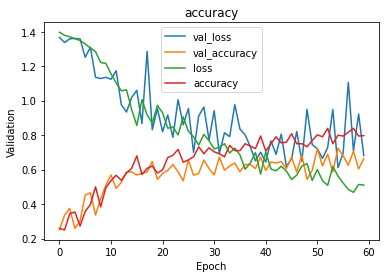

In [18]:
for key,values in (history.history).items():
    plt.plot(values,label = key)
    plt.xlabel("Epoch")
    plt.ylabel("Validation")
    plt.legend()
    plt.title(key)
    #plt.show()